In [28]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import plotting_common
import math

In [2]:
plotting_common.setup_plotting_style()

In [36]:
df = pd.read_json("data/state-space-sizes.json")
df["positions"] = np.zeros_like(df["solvable_at"])
df["reachable"] = np.zeros_like(df["solvable_at"])

total_holes = 33
for nr_pegs in range(0, 34):
    df.loc[nr_pegs, "positions"] = math.comb(total_holes, nr_pegs)
    df.loc[nr_pegs, "reachable"] = df.loc[total_holes - nr_pegs, "solvable_at"]

df = df[1:33]

In [37]:
df

,solvable_at,solvable_norm_at,via_solvable_at,via_solvable_norm_at,positions,reachable
1,1,1,1,1,33,5
2,4,1,4,1,528,32
3,12,2,12,2,5456,334
4,60,8,60,8,40920,2529
5,296,39,292,38,237336,14727
6,1338,171,1292,164,1107568,68236
7,5648,719,5012,635,4272048,255544
8,21842,2757,16628,2089,13884156,800152
9,77559,9751,49236,6174,38567100,2120101
10,249690,31312,127964,16020,92561040,4792664


In [5]:
total_positions = np.sum(df["positions"])
total_solvable = np.sum(df["solvable_at"])

print(f"{total_solvable / total_positions * 100:.2f}% of positions are solvable")

2.18% of positions are solvable


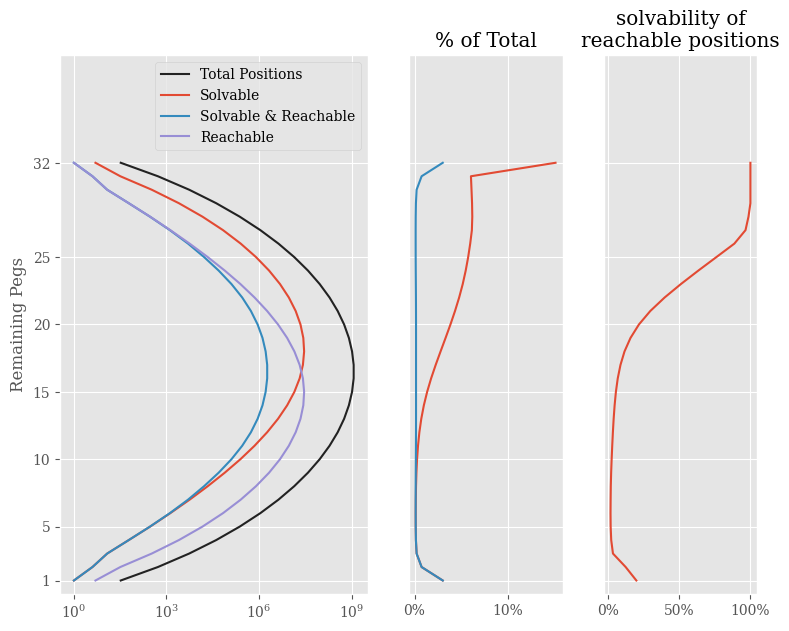

In [59]:
pegs = np.arange(1, 33)

gs = gridspec.GridSpec(1, 3, width_ratios=[2,1,1])

ax = plt.subplot(gs[0])

ax.plot(df["positions"], pegs, color="#222", label="Total Positions")
ax.plot(df["solvable_at"], pegs, label="Solvable")
ax.plot(df["via_solvable_at"], pegs, label="Solvable & Reachable")
ax.plot(df["reachable"], pegs, label="Reachable")
ax.set_xscale("log")
ax.set_ylabel("Remaining Pegs")
ax.set_ylim(0, 40)
# ax.set_xlim(0.6, 2e10)
ax.legend()

ax.set_yticks([1, 5, 10, 15, 20, 25, 32])
ax.set_xticks([1, 10**3, 10**6, 10**9])

ax = plt.subplot(gs[1], sharey=ax)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

ax.plot(df["solvable_at"] / df["positions"] * 100, pegs)
ax.plot(df["via_solvable_at"] / df["positions"] * 100, pegs)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:.0f}%"))
ax.set_title("% of Total")


ax = plt.subplot(gs[2], sharey=ax)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

ax.plot(df["via_solvable_at"] / df["reachable"] * 100, pegs)
ax.set_title("solvability of\nreachable positions")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:.0f}%"))

plt.gcf().set_size_inches(9, 7)

# _ = ax.legend()